### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading Datasets

In [2]:
df1 = pd.read_csv('deliveries.csv')

In [3]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches = pd.read_csv('matches.csv')

In [5]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Converting the Raw data to readable format

In [6]:
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
matches.info()
#city,winner,playerofmatch,umpire1,2 has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
# matches.drop(['id','umpire3'],axis = 1,inplace = True)

In [9]:
matches[matches.city.isnull()]
matches[matches.venue == 'Dubai International Cricket Stadium']

matches.city.replace(np.nan,'UAE',inplace = True)

In [10]:
match = matches.copy()

In [11]:
matches[matches.player_of_match.isnull()]

matches.dropna(subset=['player_of_match','umpire1','umpire2'])

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,IPL-2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


# VIZUALIZATION

### Number of matches played in each IPL season

#### maximum number of IPL match played in 2013

Text(0.5, 1.0, 'Number of matches played in each IPL season')

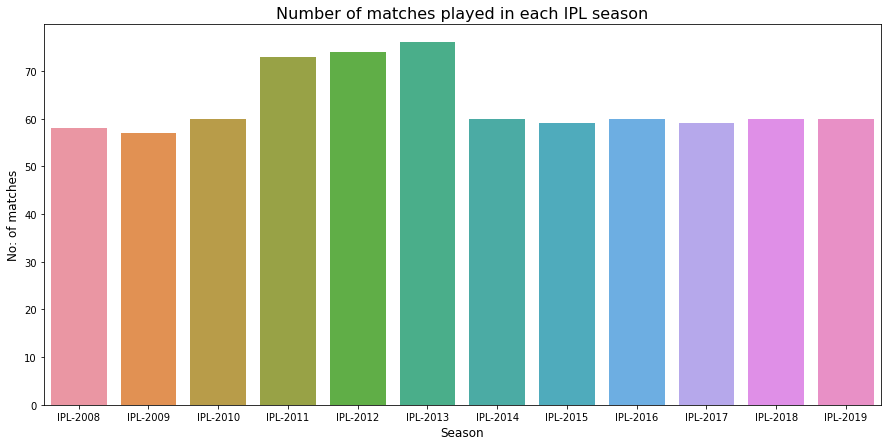

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(x='Season',
              data=matches,
              order = matches['Season'].value_counts().index.sort_values()
              )
plt.xlabel('Season',fontsize=12)
plt.ylabel('No: of matches',fontsize=12)
plt.title('Number of matches played in each IPL season',fontsize=16)

### Matches won by the Teams

#### Mumbai Indians won maximum number of matches

Text(0.5, 1.0, 'Matches won by the Teams')

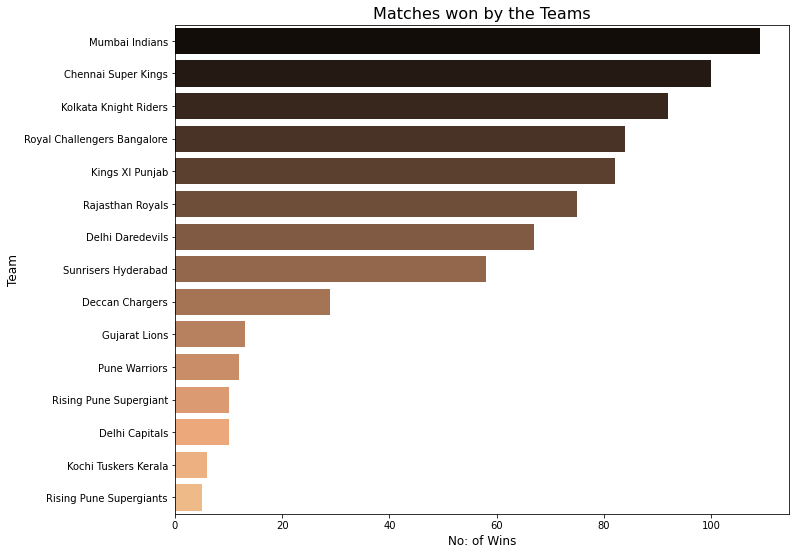

In [13]:
# Matches won by the Teams
plt.figure(figsize = (11,9))
sns.countplot(y = 'winner',
              data = matches,
              order= matches['winner'].value_counts().index,
              palette = 'copper' )
plt.xlabel('No: of Wins',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.title('Matches won by the Teams',fontsize=16)

### Maximum number of match played In Eden Gardens

Text(0.5, 1.0, 'Number of matches played in each Stadium')

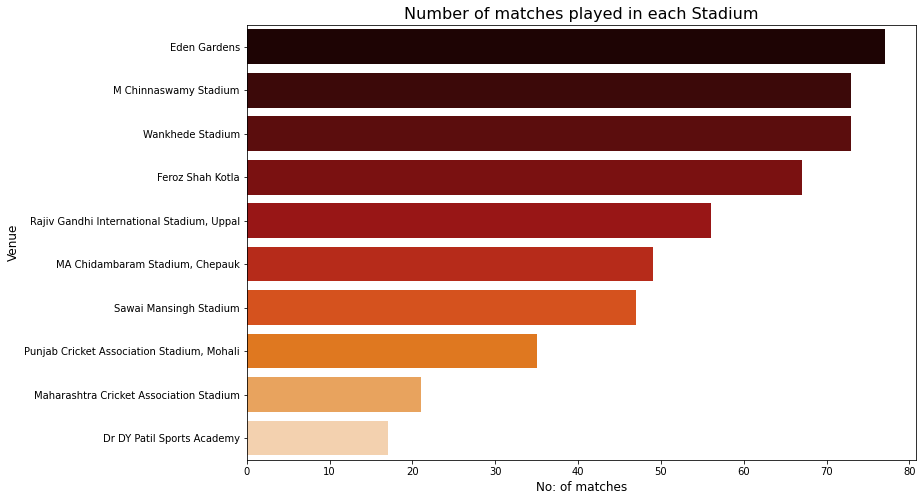

In [14]:
plt.figure(figsize = (12,8))
sns.countplot(y = 'venue',
              data = matches,
              order = matches['venue'].value_counts().iloc[:10].index,
              palette='gist_heat')
plt.xlabel('No: of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Number of matches played in each Stadium',fontsize=16)

# Visual wonder starts from here

## Most man of the matches won by a player

#### Christopher Henry Gayle has won the most MOM awards in IPL

Text(0, 0.5, 'Count')

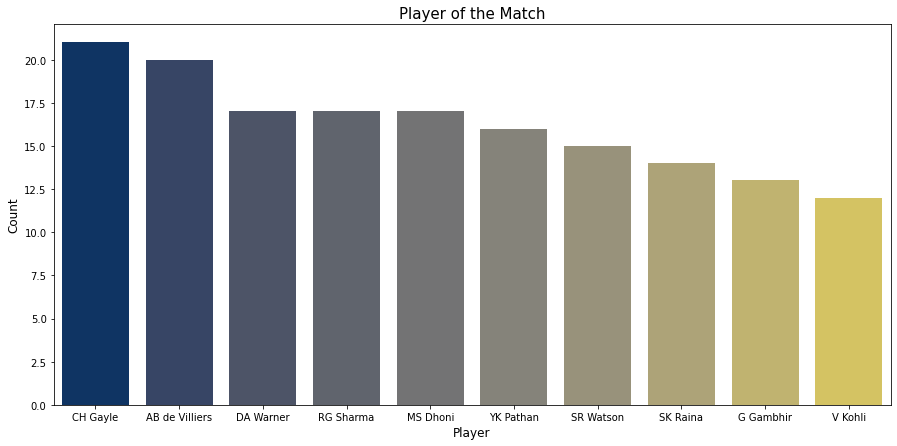

In [15]:
plt.figure(figsize=(15,7))
player_of_match=matches['player_of_match'].value_counts()[:10]
sns.barplot(player_of_match.index,
            player_of_match.values,
            palette='cividis')

plt.title("Player of the Match",fontsize=15)
plt.xlabel('Player',fontsize=12)
plt.ylabel('Count',fontsize=12)

In [16]:
def win(x):
    if x > 0:
        return "bat first"
    else:
        return "field first"

In [17]:
matches['win_by'] = matches['win_by_runs'].apply(win)

## Toss factor on winning a match

#### It seems that teams enjoy chasing more in IPL

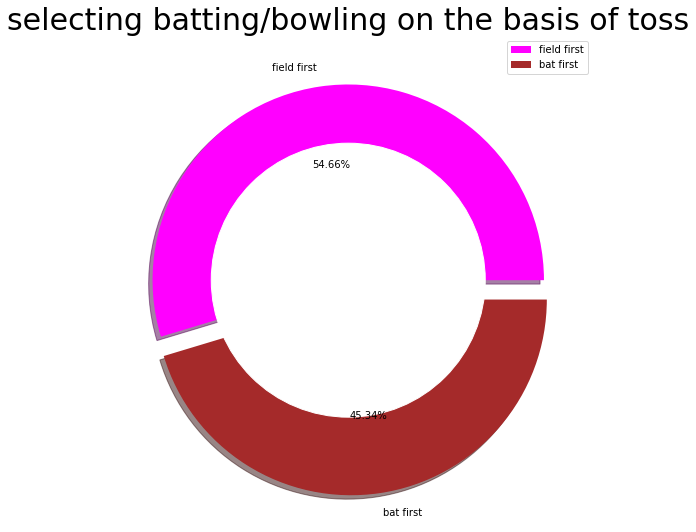

In [18]:
size = [346, 287]
colors = ['magenta', 'brown']
labels = "field first", "bat first"
explode = [0,0.1]
my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%',explode = explode)
plt.title('selecting batting/bowling on the basis of toss', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

### First Feilding team has an upper edge on winning ratio. 
### The only reason why captain probably chooses to field first after winning the toss

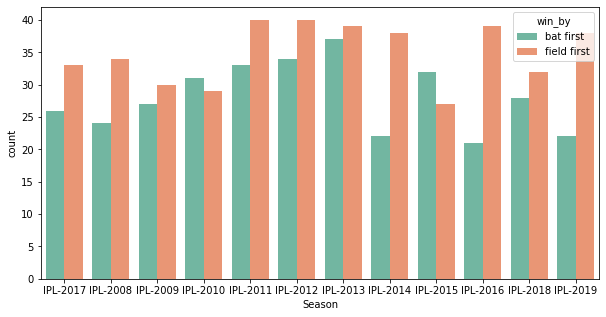

In [19]:
plt.figure(figsize = (10,5))
sns.countplot('Season', hue ='win_by',data = matches,palette = "Set2")
plt.show()

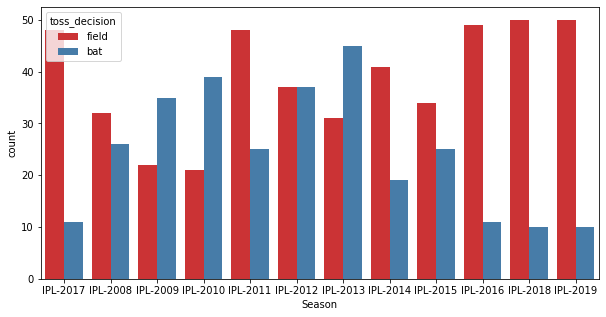

In [20]:
plt.figure(figsize = (10,5))
sns.countplot('Season', hue ='toss_decision',data = matches,palette = "Set1")
plt.show()

## Perks of a Purple cap

#### Virat was a show-stealer in 2016 IPL

In [21]:
Season = matches[['id','Season','winner']]

In [22]:
main_data = df1.merge(Season,how = 'inner',right_on = 'id',left_on = 'match_id')

<Figure size 576x144 with 0 Axes>

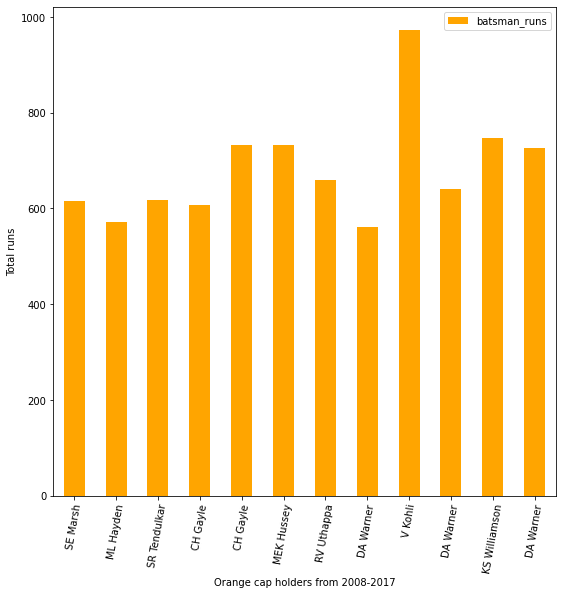

In [23]:
plt.figure(figsize = (8,2))
Season_orange_cap = main_data.groupby(["Season","batsman"])["batsman_runs"].sum().reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Season_orange_cap= Season_orange_cap.drop_duplicates(subset=["Season"],keep="first").sort_values(by="Season").reset_index(drop=True)
Season_orange_cap.plot('batsman','batsman_runs',color='orange',kind='bar')
plt.xticks(rotation=80)
plt.ylabel('Total runs')
plt.xlabel('Orange cap holders from 2008-2017')
plt.show()


In [24]:
Season_orange_cap

,Season,batsman,batsman_runs
0,IPL-2008,SE Marsh,616
1,IPL-2009,ML Hayden,572
2,IPL-2010,SR Tendulkar,618
3,IPL-2011,CH Gayle,608
4,IPL-2012,CH Gayle,733
5,IPL-2013,MEK Hussey,733
6,IPL-2014,RV Uthappa,660
7,IPL-2015,DA Warner,562
8,IPL-2016,V Kohli,973
9,IPL-2017,DA Warner,641


## The purple Yorks- Purple cap holders

#### DJ Bravo is a rockstar- justified!!

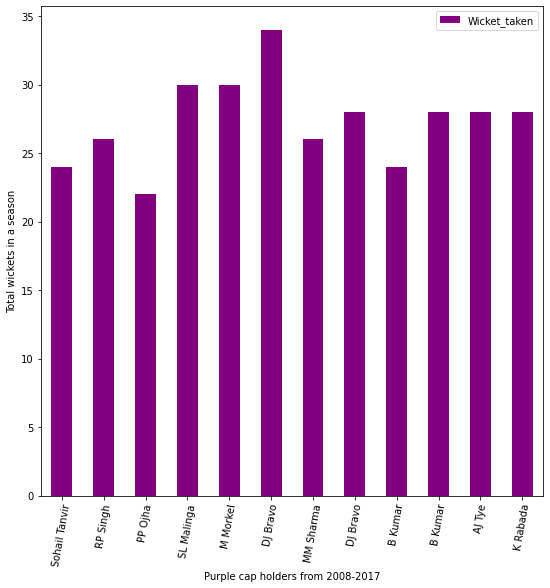

In [25]:
Season_purple_cap= main_data.groupby(["Season","bowler"])["dismissal_kind"].agg('count').reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Season_purple_cap= Season_purple_cap.drop_duplicates(subset=["Season"],keep="first").sort_values(by="Season").reset_index(drop=True)
Season_purple_cap.columns= ["Season","Bowler","Wicket_taken"]
Season_purple_cap.plot('Bowler','Wicket_taken',color='purple',kind='bar')
plt.xticks(rotation=80)
plt.ylabel('Total wickets in a season')
plt.xlabel('Purple cap holders from 2008-2017')
plt.show()

In [26]:
Season_purple_cap

,Season,Bowler,Wicket_taken
0,IPL-2008,Sohail Tanvir,24
1,IPL-2009,RP Singh,26
2,IPL-2010,PP Ojha,22
3,IPL-2011,SL Malinga,30
4,IPL-2012,M Morkel,30
5,IPL-2013,DJ Bravo,34
6,IPL-2014,MM Sharma,26
7,IPL-2015,DJ Bravo,28
8,IPL-2016,B Kumar,24
9,IPL-2017,B Kumar,28


## IPL winners

In [27]:
final_matches=matches.drop_duplicates('Season', keep='last')

final_matches[['Season','winner']].reset_index(drop=True).sort_values('Season')

,Season,winner
1,IPL-2008,Rajasthan Royals
2,IPL-2009,Deccan Chargers
3,IPL-2010,Chennai Super Kings
4,IPL-2011,Chennai Super Kings
5,IPL-2012,Kolkata Knight Riders
6,IPL-2013,Mumbai Indians
7,IPL-2014,Kolkata Knight Riders
8,IPL-2015,Mumbai Indians
9,IPL-2016,Sunrisers Hyderabad
0,IPL-2017,Mumbai Indians


## Out of 10 seasons, 7 times toss winning captain in the final has won the IPL 

In [28]:
final_matches[final_matches.toss_winner == final_matches.winner]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_by
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN,bat first
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN,field first
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN,bat first
306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN,bat first
456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN,bat first
516,517,IPL-2014,Bangalore,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,field first
635,636,IPL-2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,bat first
695,7953,IPL-2018,Mumbai,27-05-2018,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon,field first
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,bat first


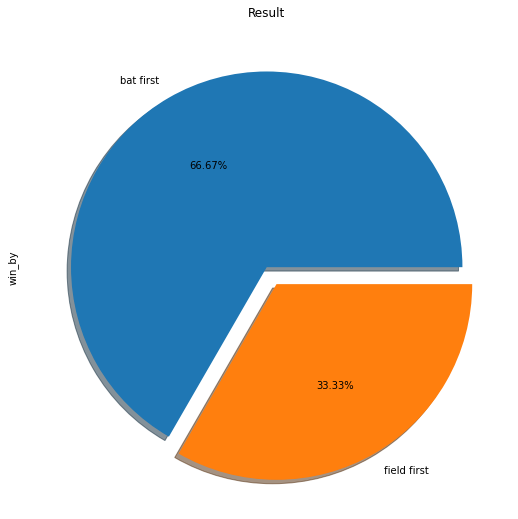

In [29]:
final_matches.win_by.value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow = True,explode = [0,0.1])
plt.title('Result')
plt.show()

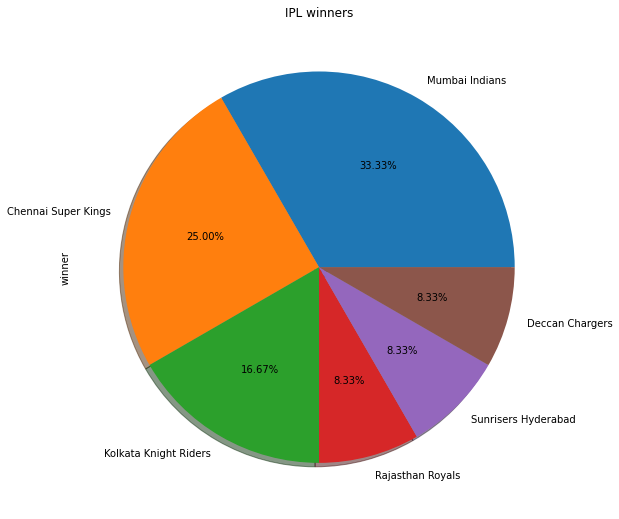

In [30]:
final_matches.winner.value_counts().plot(kind = 'pie',autopct = '%0.2f%%',shadow = True)
plt.title('IPL winners')
plt.show()

## The feast of Boundaries 

#### The BJP MLA has got no chill - Gautam Gambhir

In [31]:
fours = main_data[main_data.batsman_runs == 4]

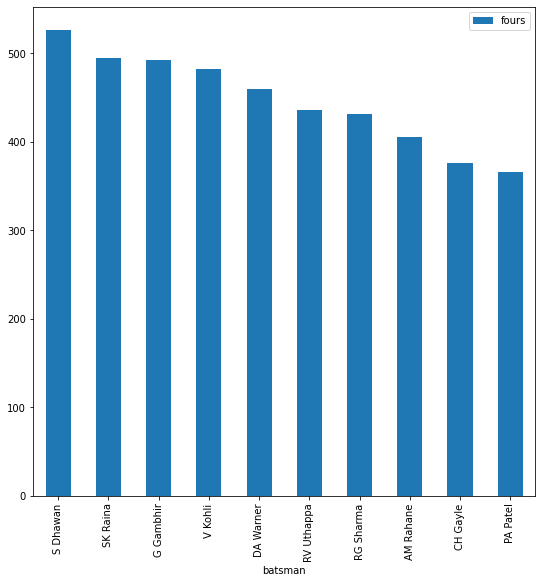

In [32]:
batsman_fours = fours.groupby('batsman')['batsman_runs'].agg(fours='count').reset_index().sort_values('fours',ascending = 0)
batsman_fours.iloc[:10,].plot('batsman','fours',kind = 'bar')
plt.show()

## SIX bonanza

### Is there any proof required that who is the UNIVERSE BOSS!!!

In [33]:
batsman_sixes = main_data[main_data.batsman_runs == 6].groupby('batsman')['batsman_runs'].agg(six='count').reset_index().sort_values('six',ascending = 0)


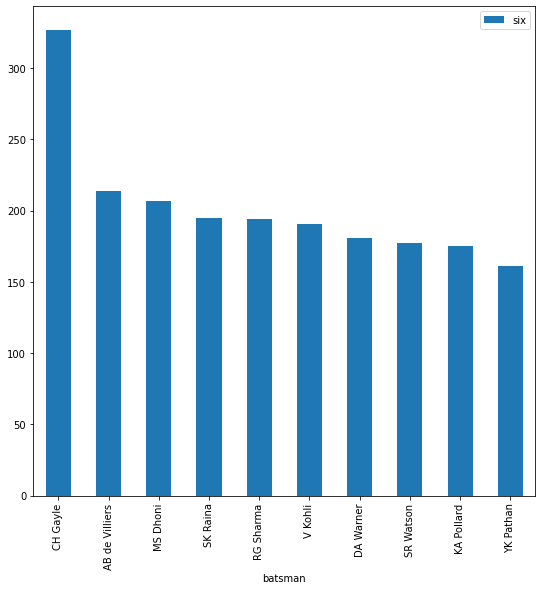

In [34]:
batsman_sixes.iloc[:10,].plot('batsman','six',kind = 'bar')
plt.show()

## IPL Heroes - leading Run-scorers

#### No doubt why CSK has been one of the most successful teams of IPL- Suresh Raina

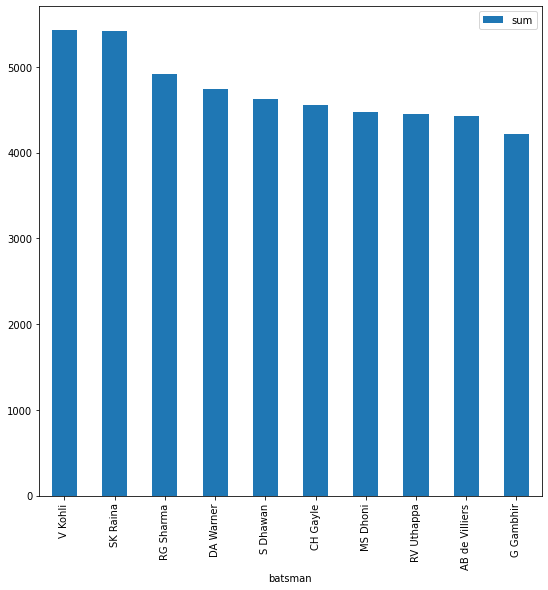

,batsman,sum
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [35]:
batsman_score=main_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score.iloc[:10,:].plot('batsman','sum',kind = 'bar')
plt.show()
batsman_score.iloc[:10,]

### Most wicket takers of IPL

#### World's no T20 team can be created without Lasith Malinga

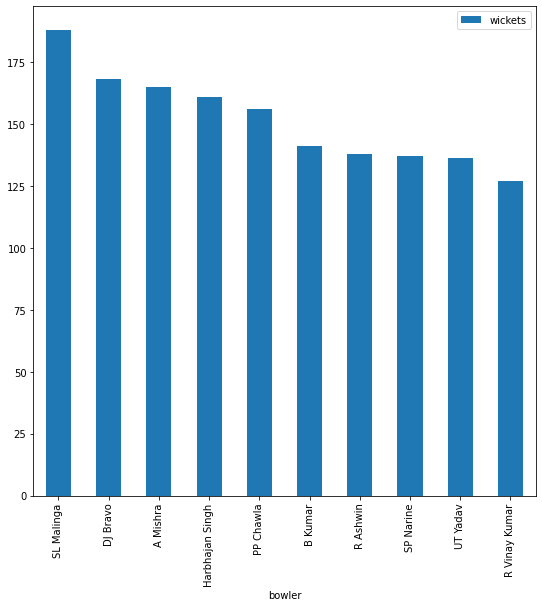

,bowler,wickets
340,SL Malinga,188
93,DJ Bravo,168
7,A Mishra,165
126,Harbhajan Singh,161
264,PP Chawla,156
53,B Kumar,141
269,R Ashwin,138
347,SP Narine,137
381,UT Yadav,136
281,R Vinay Kumar,127


In [36]:
bowler = main_data.groupby('bowler')['dismissal_kind'].agg(wickets='count').reset_index().sort_values('wickets',ascending = 0)
bowler.iloc[:10,].plot('bowler','wickets',kind = 'bar')
plt.show()
bowler.iloc[:10,]